In [2]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
%matplotlib notebook

In [3]:
X = loadmat('ex7data2.mat')['X']

In [4]:
K = 3
initial_centroids = np.array([[3 ,3], [6,2], [8, 5]])

In [5]:
def findClosestCentroids(X, initial_centroids):
    m,n = initial_centroids.shape
    return np.argmin(la.norm(X-(initial_centroids.reshape(m,1,n)) , axis=2), axis = 0)

def computeCentroids(X,idx,K=None):
    return (np.apply_along_axis(lambda x : np.bincount(idx,x) ,0,X).T/ np.bincount(idx)).T

def initCentroids(X, K):
    return X[np.random.permutation(X.shape[0])[:K]]

def runKMeans(X, initial_centroids, max_iters=10, plot_track=False, only_final = False,dim1=0,dim2=1):
    centroids = initial_centroids
    K = len(centroids)
    #print(K)
    clr = np.random.rand(K,3)
    #print(clr)
    if plot_track or only_final:
        plt.figure()
        plt.plot(X[:,dim1] , X[:,dim2],'ok',ms = 4)
        if not only_final:
            for i in range(K):
                plt.plot(centroids[i,dim1],centroids[i,dim2],'o',ms=5,color = clr[i])
    for j in range(max_iters-1):
        idx = findClosestCentroids(X, centroids)
        prev = centroids
        centroids = computeCentroids(X,idx)
        if plot_track and not only_final :
            for i in range(K):
                plt.plot(centroids[i,dim1],centroids[i,dim2],'o',ms=5,color = clr[i])
                plt.plot([prev[i,dim1],centroids[i,dim1]],[prev[i,dim2],centroids[i,dim2]],color = clr[i])
    
    idx = findClosestCentroids(X, centroids)
    prev = centroids
    centroids = computeCentroids(X,idx)
    if plot_track or only_final :
        for i in range(K):
            plt.plot(centroids[i,dim1],centroids[i,dim2],'x',color = clr[i])
            if not only_final :
                plt.plot([prev[i,dim1],centroids[i,dim1]],[prev[i,dim2],centroids[i,dim2]],color = clr[i])
    return centroids, idx

In [6]:
bird = plt.imread('bird_small.png')

In [7]:
#idx = findClosestCentroids(X,initial_centroids)
#computeCentroids(X, idx, K)

In [8]:
#runKMeans(X, initial_centroids, max_iters, True)

<IPython.core.display.Javascript object>


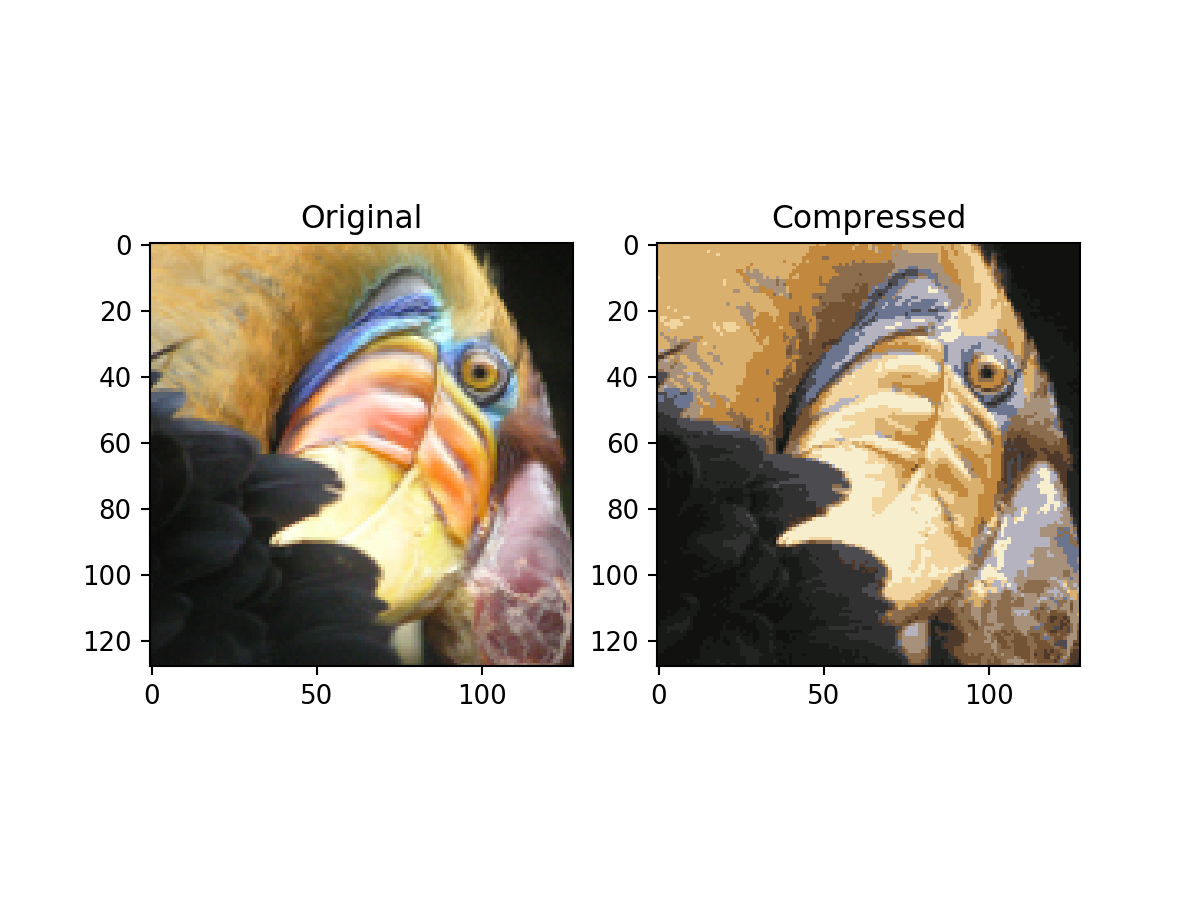

Text(0.5, 1.0, 'Compressed')

In [9]:
Xb = bird.reshape(-1,3)
K = 15
max_iters = 10
colors16,newcolor = runKMeans(Xb, initCentroids(Xb,K), max_iters)
newbird = colors16[newcolor].reshape(bird.shape)

plt.subplot(121)
plt.imshow(bird)
plt.title('Original')

plt.subplot(122)
plt.imshow(newbird)
plt.title('Compressed')